  Using cached https://files.pythonhosted.org/packages/b0/16/63576a1a001752e34bf8ea62e367997530dc553b689356b9879339cf45a4/xlrd-1.2.0-py2.py3-none-any.whl
You should consider upgrading via the 'pip install --upgrade pip' command.


In [73]:
!pip install xlrd --user
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline

In [108]:
cc = pd.read_excel("202010 Eval Extract Request.xlsx",sheet_name = "Instructor Comments")
cc.set_index("Course Key",inplace = True)

In [109]:
ccf = cc[cc["Comments"].notnull()]

In [110]:
freqofreviews = pd.Series(dict(Counter(list(ccf.index))))

In [111]:
filt = freqofreviews[freqofreviews > 20].sort_values(ascending = False)
xfilt = [i for i in range(len(filt.index))]

<BarContainer object of 2097 artists>

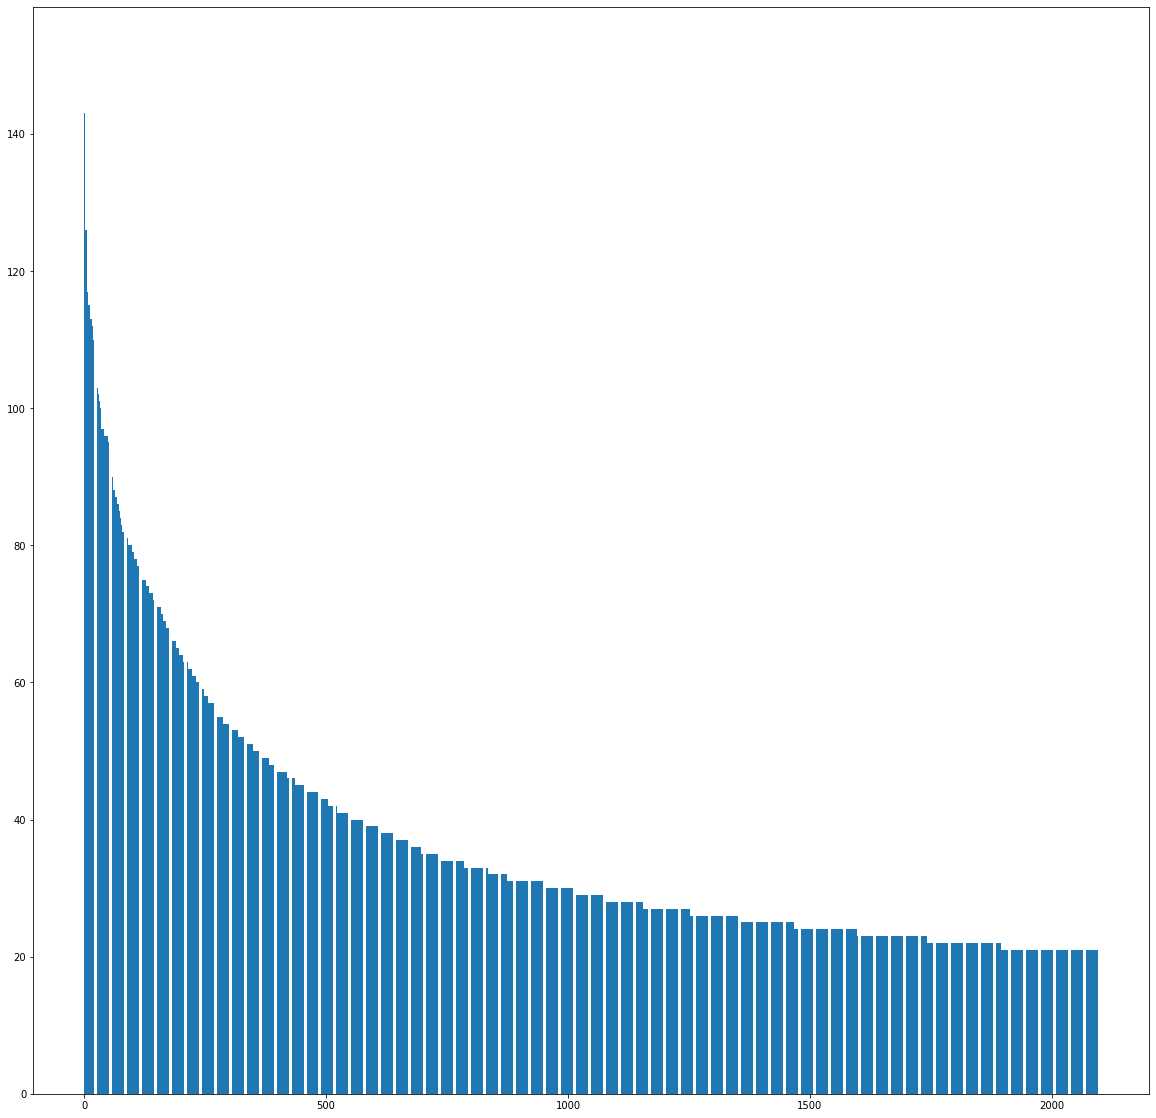

In [86]:
plt.figure(figsize=(20,20))
plt.bar(xfilt,filt.values)

In [112]:
keptcrns = list(freqofreviews[freqofreviews > 60].index)

In [113]:
ccfri = ccf.reset_index()
ccfri["course key tf"] = ccfri["Course Key"].apply(lambda x: x in keptcrns)

In [114]:
finalcsv = ccfri[ccfri["course key tf"] == True].drop(["course key tf"],axis = 1)

In [115]:
finalcsv.to_csv("filtered data set - instructors.csv")